In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Modeling

In this step we'll load the cleaned data set and then perform the modeling steps.

In [6]:
# Load cleaned data from eda step
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)

In [8]:
# Perform Logistic Regression on the data set

# Numerical Predictors
# BMI
# MentHlth
# PhysHlth
# Age

# Categorical Predictors
# HighBP
# HighChol
# CholCheck
# Smoker
# Stroke
# HeartDiseaseorAttack
# PhysActivity
# Fruits
# Veggies
# HvyAlcoholConsump
# AnyHealthcare
# NoDocbcCost
# GenHlth
# DiffWalk
# Sex
# Education
# Income

# Target
# Diabetes_012

# Standardize Data
dependent_column = ["Diabetes_012"]
numerical_predictor_columns = ["BMI", "MentHlth", "PhysHlth", "Age"]

# Find Z-score of Numerical Predictors
Z_train = preprocessing.scale(df[numerical_predictor_columns])
Z_train = pd.DataFrame(Z_train, columns=numerical_predictor_columns)

# Create dummy vars
dummy_HighBP = pd.get_dummies(df["HighBP"], drop_first=True)
dummy_HighChol = pd.get_dummies(df["HighChol"], drop_first=True)
dummy_CholCheck = pd.get_dummies(df["CholCheck"], drop_first=True)
dummy_Smoker = pd.get_dummies(df["Smoker"] , drop_first=True)
dummy_Stroke = pd.get_dummies(df["Stroke"] , drop_first=True)
dummy_HeartDiseaseorAttack = pd.get_dummies(df["HeartDiseaseorAttack"] , drop_first=True)
dummy_PhysActivity = pd.get_dummies(df["PhysActivity"] , drop_first=True)
dummy_Fruits = pd.get_dummies(df["Fruits"] , drop_first=True)
dummy_Veggies = pd.get_dummies(df["Veggies"] , drop_first=True)
dummy_HvyAlcoholConsump = pd.get_dummies(df["HvyAlcoholConsump"] , drop_first=True)
dummy_AnyHealthcare = pd.get_dummies(df["AnyHealthcare"] , drop_first=True)
dummy_NoDocbcCost = pd.get_dummies(df["NoDocbcCost"] , drop_first=True)
dummy_GenHlth = pd.get_dummies(df["GenHlth"] , drop_first=True)
dummy_DiffWalk = pd.get_dummies(df["DiffWalk"] , drop_first=True)
dummy_Sex = pd.get_dummies(df["Sex"] , drop_first=True)
dummy_Education = pd.get_dummies(df["Education"] , drop_first=True)
dummy_Income = pd.get_dummies(df["Income"] , drop_first=True)

# Concatenate the standardized numerical features with the dummy vars
X = pd.concat([Z_train, dummy_HighBP, dummy_HighChol, dummy_CholCheck, dummy_Smoker, dummy_Stroke, dummy_HeartDiseaseorAttack,
                     dummy_PhysActivity, dummy_Fruits, dummy_Veggies, dummy_HvyAlcoholConsump, dummy_AnyHealthcare, dummy_NoDocbcCost,
                    dummy_GenHlth, dummy_DiffWalk, dummy_Sex, dummy_Education, dummy_Income], axis=1)
X.columns = X.columns.astype(str)
y = df[dependent_column]

# Do this to avoid warnings
y = y.values.ravel()

# Split data into training and test data after standardization
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1337)

In [10]:
print(X.shape, y.shape)

(229781, 34) (229781,)


In [12]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [14]:
print(X_resampled.shape, y_resampled.shape)

(13887, 34) (13887,)


In [16]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
Complete = AgglomerativeClustering(metric='cosine', n_clusters=5, linkage='complete')
Complete.fit(X_resampled)
#print(Complete.labels_)

Complete = linkage(Complete.children_, method='complete')

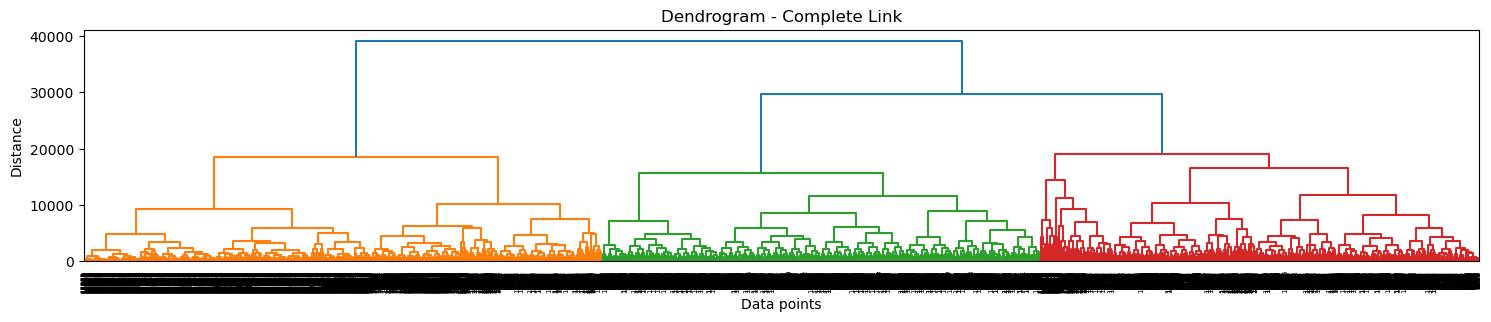

In [36]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(18, 3))

# Plot the dendrogram on subplots
dendrogram(Complete, ax=axes)

# Set titles and labels for subplots
axes.set_title('Dendrogram - Complete Link')
axes.set_xlabel('Data points')
axes.set_ylabel('Distance')


# Show the figure
plt.show()

In [44]:
from scipy.cluster.hierarchy import fcluster

# Cut the linkage into clusters using a distance threshold
distance_threshold = 1000
cluster_labels = fcluster(Complete, t=distance_threshold, criterion='distance')
unique_labels = np.unique(cluster_labels)
print(unique_labels)
print(cluster_labels.shape)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [46]:
from matplotlib.colors import ListedColormap
colors = ['red', 'green', 'blue', 'orange', 'yellow']
cmap = ListedColormap(colors)

ValueError: 'c' argument has 13886 elements, which is inconsistent with 'x' and 'y' with size 472158.

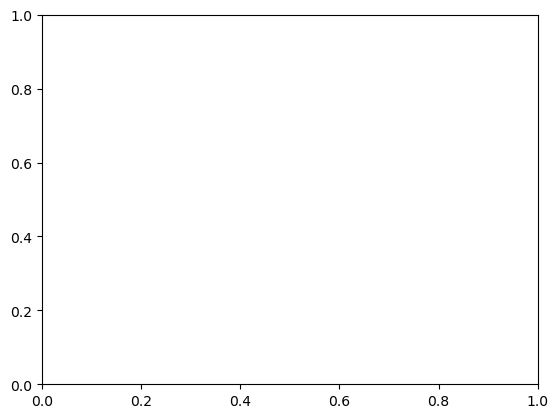

In [48]:
import matplotlib.pyplot as plt
plt.scatter(X_resampled, X_resampled, c=cluster_labels, cmap=cmap)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Clustering with Complete Link, Cut Threshold = 1000)')

legend_handles = [plt.Line2D([], [], marker='o', color=color, linestyle='None') for color in colors]
legend_labels = colors

# Create the legend
plt.legend(legend_handles, legend_labels)

plt.show()